# Lab 01: Urbana Weather

---
author: Qiran Hu
date: September 6, 2024
embed-resources: true
---

## Introduction

As the manager for the Market at the Square, the market moves from outdoors to indoors each year during the autumn. In order to reliably predict when to make the move, the manager hopes to find a model for the minimum daily temperature so that he can predict when it will be too cold to hold the market outdoors. 

By accurately predicting the optimal timing for the transition based on minimum daily temperatures, the market management can provide operations, reduce last-minute hassles, and ensure a smooth transition during out door events Hence, this efficiency can lead to cost savings and better resource allocation. For instance, vendors can greatly benefit from advance notice about the transition, which allows them to plan their inventory and staffing better and make arrangements for the different space and environmental conditions indoors. This predictability can lead to a better vendor relationship with the market; it is crucial for the market’s long-term success. Moreover, reliable market operations support the local economy by ensuring that local farmers and vendors have a consistent venue to sell their goods. Furthermore, by maintaining a steady operation, the market contributes to the sustainability of local agriculture and small businesses.

With KNN regression models and correct data splitting in this scenario, the manager can easily predict the minimum daily temperature for deciding when to move the Market at the Square indoors. Thus, research in developing such a predictive model is important because it directly contributes to the operational excellence of community centric businesses like farmer's markets. It also helps other markets and similar operations to adopt a more analytical approach to broader communities across similar climates.

## Methods

To predict the optimal timing to move the Market at the Square indoors based on temperature forecasts, the manager decides to use the Urbana Weather data was collected using the Open-Meteo API. The Historical Weather API is based on reanalysis datasets that uses various data sources to provide a comprehensive record of past weather conditions. 

With the latitude of 40.1106 and the longitude of -88.2073, the data contains specific weather records in Lincoln Square. The data is split into serval datasets based on certain time periods. The variables `temperature_2m_min`, `year`, and `day_of_year` are used for modeling. Then, the data is split into feature matrix and target vector for each dataset set, such as training, validation-train, validation, and test. 

The data splitting is used here to ensure that the model has the best evaluation by training on historical data and validating on more recent data, which mimics real-life forecasting conditions. The KNN Regression is also used here to  predict values based on the nearest historical data points, which is critical in capturing local weather patterns. KNN regression works well for predicting tasks where the relationship between variables may be non-linear or complex; those data points that are close to each other in the feature space are likely to have similar target values. In this case, days close to each other temporally are likely to have similar temperatures, which means the manager can adjust the number of neighbors in KNN regression to change the sensitivity of his predictions.

As one can see, KNN regression is useful when dealing with real-world weather data because it is easy to implement and doesn't assume any specific form of the data distribution


In [82]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Data

In [83]:
# load data
weather_train = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-train.csv",
    index_col="date",
    parse_dates=True
)
weather_vtrain = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-vtrain.csv",
    index_col="date",
    parse_dates=True
)
weather_validation = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-validation.csv",
    index_col="date",
    parse_dates=True
)
weather_test = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-test.csv",
    index_col="date",
    parse_dates=True
)

In [84]:
weather_train

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-01-01,-4.2715,2016,1,1,1
2016-01-02,-3.8715,2016,1,2,2
2016-01-03,-4.4715,2016,1,3,3
2016-01-04,-3.0215,2016,1,4,4
2016-01-05,-5.7715,2016,1,5,5
...,...,...,...,...,...
2021-12-27,6.9980,2021,12,27,361
2021-12-28,1.7980,2021,12,28,362
2021-12-29,2.1980,2021,12,29,363


## Prepare Data for Machine Learning

Create the X and y variants of the data for use with sklearn:

In [85]:
# create X and y for train
X_train = weather_train[["year", "day_of_year"]]
y_train = weather_train["temperature_2m_min"]

# create X and y for validation-train
X_vtrain = weather_vtrain[["year", "day_of_year"]]
y_vtrain = weather_vtrain["temperature_2m_min"]

# create X and y for validation
X_validation = weather_validation[["year", "day_of_year"]]
y_validation = weather_validation["temperature_2m_min"]

# create X and y for test
X_test = weather_test[["year", "day_of_year"]]
y_test = weather_test["temperature_2m_min"]

In [86]:
# summary statistics
weather2016 = weather_train[weather_train["year"] == 2016]
weather2016

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-01-01,-4.2715,2016,1,1,1
2016-01-02,-3.8715,2016,1,2,2
2016-01-03,-4.4715,2016,1,3,3
2016-01-04,-3.0215,2016,1,4,4
2016-01-05,-5.7715,2016,1,5,5
...,...,...,...,...,...
2016-12-27,-2.4715,2016,12,27,362
2016-12-28,-3.3215,2016,12,28,363
2016-12-29,0.1785,2016,12,29,364


In [87]:
weather2016["temperature_2m_min"].count()

np.int64(366)

In [88]:
weather2016["temperature_2m_min"].mean()

np.float64(8.793390534909836)

In [89]:
weather2016["temperature_2m_min"].std()

np.float64(10.274505505649106)

In [90]:
weather2017 = weather_train[weather_train["year"] == 2017]
weather2017

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2017-01-01,-5.602,2017,1,1,1
2017-01-02,-0.652,2017,1,2,2
2017-01-03,2.598,2017,1,3,3
2017-01-04,-10.102,2017,1,4,4
2017-01-05,-11.002,2017,1,5,5
...,...,...,...,...,...
2017-12-27,-18.552,2017,12,27,361
2017-12-28,-14.952,2017,12,28,362
2017-12-29,-11.552,2017,12,29,363


In [91]:
weather2017["temperature_2m_min"].count()

np.int64(365)

In [92]:
weather2017["temperature_2m_min"].mean()

np.float64(8.399643825452054)

In [93]:
weather2017["temperature_2m_min"].std()

np.float64(9.692304500104685)

In [94]:
weather2018 = weather_train[weather_train["year"] == 2018]
weather2018

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2018-01-01,-24.002,2018,1,1,1
2018-01-02,-23.052,2018,1,2,2
2018-01-03,-14.052,2018,1,3,3
2018-01-04,-18.952,2018,1,4,4
2018-01-05,-18.102,2018,1,5,5
...,...,...,...,...,...
2018-12-27,4.148,2018,12,27,361
2018-12-28,-0.152,2018,12,28,362
2018-12-29,-6.102,2018,12,29,363


In [95]:
weather2018["temperature_2m_min"].count()

np.int64(365)

In [96]:
weather2018["temperature_2m_min"].mean()

np.float64(7.591013689450411)

In [97]:
weather2018["temperature_2m_min"].std()

np.float64(11.369451874149723)

In [98]:
weather2019 = weather_train[weather_train["year"] == 2019]
weather2019

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2019-01-01,0.948,2019,1,1,1
2019-01-02,-0.602,2019,1,2,2
2019-01-03,-4.752,2019,1,3,3
2019-01-04,-3.602,2019,1,4,4
2019-01-05,0.548,2019,1,5,5
...,...,...,...,...,...
2019-12-27,1.848,2019,12,27,361
2019-12-28,0.248,2019,12,28,362
2019-12-29,12.048,2019,12,29,363


In [99]:
weather2019["temperature_2m_min"].count()

np.int64(365)

In [100]:
weather2019["temperature_2m_min"].mean()

np.float64(7.229780811287672)

In [101]:
weather2019["temperature_2m_min"].std()

np.float64(10.88225965018401)

In [102]:
weather2020 = weather_train[weather_train["year"] == 2020]
weather2020

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2020-01-01,-3.002,2020,1,1,1
2020-01-02,3.298,2020,1,2,2
2020-01-03,2.598,2020,1,3,3
2020-01-04,0.098,2020,1,4,4
2020-01-05,-4.552,2020,1,5,5
...,...,...,...,...,...
2020-12-27,-3.052,2020,12,27,362
2020-12-28,-2.352,2020,12,28,363
2020-12-29,-6.602,2020,12,29,364


In [103]:
weather2020["temperature_2m_min"].count()

np.int64(366)

In [104]:
weather2020["temperature_2m_min"].mean()

np.float64(7.684612014247814)

In [105]:
weather2020["temperature_2m_min"].std()

np.float64(9.38359314925545)

In [106]:
weather2021 = weather_train[weather_train["year"] == 2021]
weather2021

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2021-01-01,-4.852,2021,1,1,1
2021-01-02,-1.002,2021,1,2,2
2021-01-03,-2.902,2021,1,3,3
2021-01-04,-8.902,2021,1,4,4
2021-01-05,-4.802,2021,1,5,5
...,...,...,...,...,...
2021-12-27,6.998,2021,12,27,361
2021-12-28,1.798,2021,12,28,362
2021-12-29,2.198,2021,12,29,363


In [107]:
weather2021["temperature_2m_min"].count()

np.int64(365)

In [108]:
weather2021["temperature_2m_min"].mean()

np.float64(8.119369859643836)

In [109]:
weather2021["temperature_2m_min"].std()

np.float64(10.388489289499418)

In [110]:
weather1 = weather_train[weather_train["month"] == 1]
weather1

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-01-01,-4.2715,2016,1,1,1
2016-01-02,-3.8715,2016,1,2,2
2016-01-03,-4.4715,2016,1,3,3
2016-01-04,-3.0215,2016,1,4,4
2016-01-05,-5.7715,2016,1,5,5
...,...,...,...,...,...
2021-01-27,-4.5020,2021,1,27,27
2021-01-28,-9.4020,2021,1,28,28
2021-01-29,-7.6020,2021,1,29,29


In [111]:
weather1["temperature_2m_min"].mean()

np.float64(-4.999336024275807)

In [112]:
weather1["temperature_2m_min"].std()

np.float64(6.752005953518455)

In [113]:
weather2 = weather_train[weather_train["month"] == 2]
weather2

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-02-01,-0.2215,2016,2,1,32
2016-02-02,0.6785,2016,2,2,33
2016-02-03,0.3285,2016,2,3,34
2016-02-04,-5.5715,2016,2,4,35
2016-02-05,-4.3715,2016,2,5,36
...,...,...,...,...,...
2021-02-24,4.9980,2021,2,24,55
2021-02-25,-3.0020,2021,2,25,56
2021-02-26,-3.0020,2021,2,26,57


In [114]:
weather2["temperature_2m_min"].mean()

np.float64(-3.85620881649)

In [115]:
weather2["temperature_2m_min"].std()

np.float64(6.760570391851505)

In [116]:
weather3 = weather_train[weather_train["month"] == 3]
weather3

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-03-01,-1.0715,2016,3,1,61
2016-03-02,-6.9215,2016,3,2,62
2016-03-03,0.2785,2016,3,3,63
2016-03-04,-3.2715,2016,3,4,64
2016-03-05,0.0785,2016,3,5,65
...,...,...,...,...,...
2021-03-27,5.2980,2021,3,27,86
2021-03-28,4.1480,2021,3,28,87
2021-03-29,-0.8520,2021,3,29,88


In [117]:
weather3["temperature_2m_min"].mean()

np.float64(1.5772768869892475)

In [118]:
weather3["temperature_2m_min"].std()

np.float64(5.6152123291691085)

In [119]:
weather4 = weather_train[weather_train["month"] == 4]
weather4

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-04-01,3.8285,2016,4,1,92
2016-04-02,0.5785,2016,4,2,93
2016-04-03,-2.2715,2016,4,3,94
2016-04-04,1.8785,2016,4,4,95
2016-04-05,-3.4715,2016,4,5,96
...,...,...,...,...,...
2021-04-26,5.5980,2021,4,26,116
2021-04-27,15.8480,2021,4,27,117
2021-04-28,18.2480,2021,4,28,118


In [120]:
weather4["temperature_2m_min"].mean()

np.float64(5.985861120222223)

In [121]:
weather4["temperature_2m_min"].std()

np.float64(5.615279434163861)

In [122]:
weather5 = weather_train[weather_train["month"] == 5]
weather5

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-05-01,12.1285,2016,5,1,122
2016-05-02,8.7285,2016,5,2,123
2016-05-03,7.0285,2016,5,3,124
2016-05-04,10.1285,2016,5,4,125
2016-05-05,5.2785,2016,5,5,126
...,...,...,...,...,...
2021-05-27,15.1480,2021,5,27,147
2021-05-28,11.7980,2021,5,28,148
2021-05-29,6.1480,2021,5,29,149


In [123]:
weather5["temperature_2m_min"].mean()

np.float64(12.446631715591398)

In [124]:
weather5["temperature_2m_min"].std()

np.float64(5.342291193817449)

In [125]:
weather6 = weather_train[weather_train["month"] == 6]
weather6

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-06-01,18.528500,2016,6,1,153
2016-06-02,17.128500,2016,6,2,154
2016-06-03,14.178500,2016,6,3,155
2016-06-04,17.378500,2016,6,4,156
2016-06-05,16.078499,2016,6,5,157
...,...,...,...,...,...
2021-06-26,23.648000,2021,6,26,177
2021-06-27,21.948000,2021,6,27,178
2021-06-28,22.348000,2021,6,28,179


In [126]:
weather6["temperature_2m_min"].mean()

np.float64(18.240583244444448)

In [127]:
weather6["temperature_2m_min"].std()

np.float64(3.4926871945983287)

In [128]:
weather7 = weather_train[weather_train["month"] == 7]
weather7

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-07-01,18.978498,2016,7,1,183
2016-07-02,12.778501,2016,7,2,184
2016-07-03,14.978500,2016,7,3,185
2016-07-04,17.628500,2016,7,4,186
2016-07-05,17.928500,2016,7,5,187
...,...,...,...,...,...
2021-07-27,18.848000,2021,7,27,208
2021-07-28,20.198000,2021,7,28,209
2021-07-29,23.348000,2021,7,29,210


In [129]:
weather7["temperature_2m_min"].mean()

np.float64(19.975932629032258)

In [130]:
weather7["temperature_2m_min"].std()

np.float64(2.632968793927053)

In [131]:
weather8 = weather_train[weather_train["month"] == 8]
weather8

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-08-01,20.278500,2016,8,1,214
2016-08-02,20.078499,2016,8,2,215
2016-08-03,21.078499,2016,8,3,216
2016-08-04,20.228498,2016,8,4,217
2016-08-05,23.278500,2016,8,5,218
...,...,...,...,...,...
2021-08-27,21.798000,2021,8,27,239
2021-08-28,23.398000,2021,8,28,240
2021-08-29,23.498000,2021,8,29,241


In [132]:
weather8["temperature_2m_min"].mean()

np.float64(19.136954204301073)

In [133]:
weather8["temperature_2m_min"].std()

np.float64(2.8891179721330853)

In [134]:
weather9 = weather_train[weather_train["month"] == 9]
weather9

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-09-01,16.128500,2016,9,1,245
2016-09-02,15.278501,2016,9,2,246
2016-09-03,14.828500,2016,9,3,247
2016-09-04,15.678500,2016,9,4,248
2016-09-05,20.178500,2016,9,5,249
...,...,...,...,...,...
2021-09-26,12.148000,2021,9,26,269
2021-09-27,19.148000,2021,9,27,270
2021-09-28,15.898000,2021,9,28,271


In [135]:
weather9["temperature_2m_min"].mean()

np.float64(16.793083272222223)

In [136]:
weather9["temperature_2m_min"].std()

np.float64(3.8157793540988205)

In [137]:
weather10 = weather_train[weather_train["month"] == 10]
weather10

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-10-01,14.378500,2016,10,1,275
2016-10-02,12.678500,2016,10,2,276
2016-10-03,14.728500,2016,10,3,277
2016-10-04,15.128500,2016,10,4,278
2016-10-05,19.228498,2016,10,5,279
...,...,...,...,...,...
2021-10-27,3.948000,2021,10,27,300
2021-10-28,8.098000,2021,10,28,301
2021-10-29,10.848000,2021,10,29,302


In [138]:
weather10["temperature_2m_min"].mean()

np.float64(10.102276843709678)

In [139]:
weather10["temperature_2m_min"].std()

np.float64(5.852141713114067)

In [140]:
weather11 = weather_train[weather_train["month"] == 11]
weather11

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-11-01,16.5285,2016,11,1,306
2016-11-02,17.6785,2016,11,2,307
2016-11-03,16.4285,2016,11,3,308
2016-11-04,7.9785,2016,11,4,309
2016-11-05,5.2785,2016,11,5,310
...,...,...,...,...,...
2021-11-26,-6.6520,2021,11,26,330
2021-11-27,-2.4520,2021,11,27,331
2021-11-28,-1.6020,2021,11,28,332


In [141]:
weather11["temperature_2m_min"].mean()

np.float64(1.780861123611111)

In [142]:
weather11["temperature_2m_min"].std()

np.float64(5.523112824638673)

In [143]:
weather12 = weather_train[weather_train["month"] == 12]
weather12

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-12-01,0.4285,2016,12,1,336
2016-12-02,2.6285,2016,12,2,337
2016-12-03,1.0285,2016,12,3,338
2016-12-04,0.4785,2016,12,4,339
2016-12-05,-0.3215,2016,12,5,340
...,...,...,...,...,...
2021-12-27,6.9980,2021,12,27,361
2021-12-28,1.7980,2021,12,28,362
2021-12-29,2.1980,2021,12,29,363


In [144]:
weather12["temperature_2m_min"].mean()

np.float64(-2.210357530969355)

In [145]:
weather12["temperature_2m_min"].std()

np.float64(5.433891013192055)

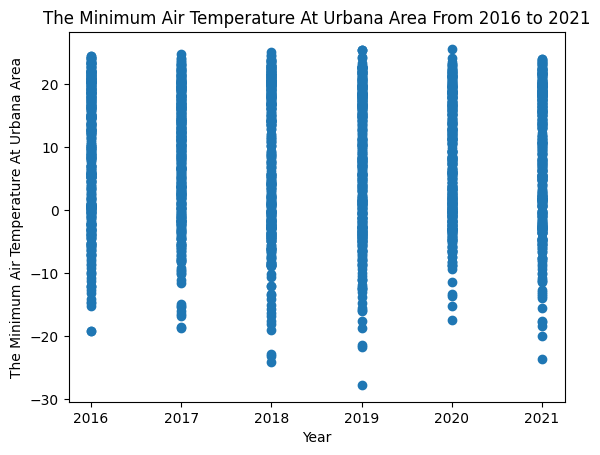

In [146]:
# visualizations
import matplotlib.pyplot as plt
plt.scatter(x = weather_train["year"], y = weather_train["temperature_2m_min"])
plt.title("The Minimum Air Temperature At Urbana Area From 2016 to 2021")
plt.xlabel("Year")
plt.ylabel("The Minimum Air Temperature At Urbana Area")
plt.show()

### Models

In [147]:
# process data for ML
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [148]:
knn001 = KNeighborsRegressor(n_neighbors=1)
knn010 = KNeighborsRegressor(n_neighbors=10)
knn100 = KNeighborsRegressor(n_neighbors=100)

In [149]:
knn001.fit(X_vtrain, y_vtrain)

KNeighborsRegressor(n_neighbors=1)

In [150]:
knn010.fit(X_vtrain, y_vtrain)

KNeighborsRegressor(n_neighbors=10)

In [151]:
knn100.fit(X_vtrain, y_vtrain)

KNeighborsRegressor(n_neighbors=100)

In [152]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


In [153]:
rmse_val_001 = rmse(y_validation, knn001.predict(X_validation))
rmse_val_001

np.float64(6.53635524135604)

In [154]:
rmse_val_010 = rmse(y_validation, knn010.predict(X_validation))
rmse_val_010

np.float64(5.272914979181495)

In [155]:
rmse_val_100 = rmse(y_validation, knn100.predict(X_validation))
rmse_val_100

np.float64(4.70645988033388)

In [156]:
# train models
knn100.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [157]:
rmse(y_test, knn100.predict(X_test))

np.float64(5.129713081159473)

## Results

In [158]:
# report model metrics
knn130 = KNeighborsRegressor(n_neighbors = 130)

In [159]:
knn130.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=130)

In [160]:
rmse(y_test, knn130.predict(X_test))

np.float64(5.109669141036818)

In [161]:
mod = knn130

In [162]:
from joblib import dump
dump(mod, "urbana-weather.joblib")

['urbana-weather.joblib']

Based on the root mean square error, the manager was able to identify that it would be best to move outside when k is greater than 100, where k = 130 day would be ideal since the model achieves a test RMSE of 5.109669139265293 and a production RMSE of 4.6046967006809965.

## Discussion

After training serval KNN regression models with k different values, the manager realized that the test RMSE decreases as the number of k increases in each KNN regression model where the KNN regression model with k = 100 has the lowest test RMSE compared the the KNN regression models with k = 10 and k = 1. To further confirm that the test RMSE decreases as the number of k increases above 100, the manager fitted another KNN regression model with k = 130 and this model yields the best performance since it has the lowest test RMSE compared to other models and its performance exceeds the threshold of both test RMSE and production RMSE. Thus, the manager decided to use the KNN regression model with k = 130. 

Although this overall strategy seems appropriate to determine the best days for out door events, there are some potential drawbacks to consider. Weather data has a strong seasonal component, which means that simple numerical distances might not adequately reflect the cyclical nature of the data. In addition, Urbana might have specific weather patterns that are not captured well by averaging across many days. Moreover,it is also necessary to take account of external factors such as extreme climatic events might significantly affect weather patterns, which might not be well represented by historical averages if such events were not prevalent in the training period.

Since the manager utilized KNN regression model to predict temperatures for deciding when to move the Market at the Square indoors, the concept of distance between dates is crucial because it helps the manager to determine the similarity between days. In time based data, the chronological proximity often correlates with similarity in certain conditions. For example, January 1st of consecutive years would be close to each other because their `day_of_year` values are identical and their `year` values are almost the same, which means that weather patterns from one year to the next around the same time might be similar. Based on components like `year` and `day_of_year` in a Euclidean metric, the manager could indicate how close the days are within years because days are grouped by how close they are. For example, January 1st will be relative close to January 2nd and December 31st. Therefore, using a distance metric that captures temporal proximity can be quite effective. By increasing the number of neighbors in the KNN regression model, it has shown a decrease in the test RMSE, which means using a higher k value, such as 130, has proven more effective in this scenario. Conversely, it is also important to ensure that the distance metric can accurately reflect weather similarities, possibly requiring adjustments to account for unique temporal dynamics in weather data.

The concepts from the course material regarding K-Nearest Neighbors, signal and noise, and the train-validation-test split are correctly and appropriately used in this scenario. The application of the KNN regression model to predict temperatures by determining the average of the k nearest points in terms of day and year aligns with the theoretical definition provided in the course. In addition, the approach of using a model with the lowest test RMSE aligns with the goal of maximizing the signal while minimizing the noise in the data. Moreover, by dividing the data into distinct sets for training, validation, and testing data set, it helps the KNN regression model to fit the training data as well as the unseen data.

### Conclusion

Since test RMSE measures the average magnitude of the errors between predicted values and actual values, a lower test RMSE value indicates that the model's predictions are closer to the actual data points. In this case, with a model that achieves a test RMSE of 5.109669141036818, the manager should use this model to predict outdoor market events because a higher test RMSE indicates that the model would be better at predicting on new datasets. With an outstanding production RMSE of 4.6046967006809965, the model successfully predicts the minimum air temperature at 2 meters above ground for the day for 2023. With this extremely low margin of errors, the manager of the Market at the Square can easily determine the best days for out door events. However, the manager should still use this model with cautious because the predicted values might be 5.109669141036818 higher than actual value or 5.109669141036818 lower than actual value, which might cause incorrect decisions on certain days. 
